In [433]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import plotly.express as px
from pickle import loads, dumps

In [444]:
data = pd.read_hdf("training.h5")
data.drop(['credit_limit_pa','principal_amt','non_principal_amount_gross','non_principal_amount_net', 'promo_bal_amt','non_principal_amount_stmt','fc_reversals','fee_reversals', 'snapshot', 'principal_amt_chrg_off', 'fee_chg_off_reversal_amt', 'nbr_mths_due', 'recovery_amt'], axis = 1, inplace = True)

In [426]:
forecast = pd.read_hdf("forecast.h5")
forecast.drop(['fc_reversals','fee_reversals', 'snapshot', 'principal_amt_chrg_off', 'fee_chg_off_reversal_amt', 'nbr_mths_due', 'recovery_amt'], axis = 1, inplace = True )

In [428]:
data['charge_off'] = 1

In [39]:
training_correlation = data.corr()
fig = px.imshow(training_correlation, text_auto=True)
fig.show()
training_correlation["charge_off"]

financial_active               0.037885
promotion_flag                 0.022438
active_12_mths                 0.021350
bank_fico_buckets_20           0.042081
mob                           -0.012223
stmt_balance                  -0.019706
prev_balance                   0.046843
net_payments                  -0.011095
purchase_active               -0.024452
credit_limit_amt              -0.056492
credit_limit_pa               -0.017816
charge_off                     1.000000
principal_amt                 -0.018662
non_principal_amount_gross    -0.011016
non_principal_amount_net      -0.011177
non_principal_amount_stmt     -0.010967
promo_bal_amt                 -0.015102
industry                      -0.012398
time                           0.002939
net_payment_behaviour_tripd    0.057570
Name: charge_off, dtype: float64

In [429]:
cph = CoxPHFitter(penalizer=0.1)
cph.fit(data, duration_col = 'time', event_col = 'charge_off')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5.75822e+06 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'charge_off'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 5.75822e+06
number of events observed = 5.75822e+06
   partial log-likelihood = -83861400.62
         time fit was run = 2023-03-26 08:42:53 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
financial_active             -0.07       0.93       0.00            -0.07            -0.07                 0.93                 0.94
promotion_flag               -0.03       0.97       0.00            -0.03            -0.03                 0.97                 0.97
active_12_mths               -0.14       0.87       0.00            -0.14            -0.13                 0.87                 0.87
bank_fico_buckets_20         -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
mob                          -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
stmt_balance                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
prev_balance                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_payments                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
purchase_active              -0.03       0.97       0.00            -0.03            -0.03                 0.97                 0.97
credit_limit_amt              0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
credit_limit_pa              -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
principal_amt                 0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
non_principal_amount_gross   -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
non_principal_amount_net     -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
non_principal_amount_stmt    -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
promo_bal_amt                 0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
industry                     -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
net_payment_behaviour_tripd   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00

                              cmp to       z      p   -log2(p)
covariate                                                     
financial_active                0.00  -83.00 <0.005        inf
promotion_flag                  0.00  -38.63 <0.005        inf
active_12_mths                  0.00 -128.75 <0.005        inf
bank_fico_buckets_20            0.00   -6.27 <0.005      31.41
mob                             0.00   -8.55 <0.005      56.19
stmt_balance                    0.00   -2.93 <0.005       8.22
prev_balance                    0.00   -0.16   0.88       0.19
net_payments                    0.00   -8.02 <0.005      49.77
purchase_active                 0.00  -28.23 <0.005     580.10
credit_limit_amt                0.00    6.42 <0.005      32.75
credit_limit_pa                 0.00  -20.12 <0.005     296.67
principal_amt                   0.00    0.93   0.35       1.51
non_

In [445]:
cph2 = CoxPHFitter(penalizer=0.1)
cph2.fit(data, duration_col = 'time', event_col = 'charge_off')
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 5.75822e+06 total observations, 5.74252e+06 right-censored observations>
             duration col = 'time'
                event col = 'charge_off'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 5.75822e+06
number of events observed = 15698
   partial log-likelihood = -228466.89
         time fit was run = 2023-03-26 08:59:35 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
financial_active              0.04       1.04       0.00             0.03             0.04                 1.03                 1.04
promotion_flag                0.02       1.02       0.00             0.02             0.03                 1.02                 1.03
active_12_mths                0.03       1.03       0.00             0.02             0.03                 1.02                 1.03
bank_fico_buckets_20          0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
mob                          -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
stmt_balance                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
prev_balance                  0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
net_payments                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
purchase_active              -0.03       0.97       0.00            -0.04            -0.03                 0.96                 0.97
credit_limit_amt             -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
industry                     -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
net_payment_behaviour_tripd   0.03       1.03       0.00             0.02             0.03                 1.02                 1.03

                              cmp to      z      p   -log2(p)
covariate                                                    
financial_active                0.00  14.07 <0.005     146.89
promotion_flag                  0.00   8.41 <0.005      54.48
active_12_mths                  0.00   7.26 <0.005      41.23
bank_fico_buckets_20            0.00  16.36 <0.005     197.55
mob                             0.00  -4.85 <0.005      19.59
stmt_balance                    0.00  -7.72 <0.005      46.25
prev_balance                    0.00  18.28 <0.005     245.65
net_payments                    0.00  -4.40 <0.005      16.50
purchase_active                 0.00  -9.79 <0.005      72.79
credit_limit_amt                0.00 -21.99 <0.005     353.62
industry                        0.00  -4.93 <0.005      20.25
net_payment_behaviour_tripd     0.00  22.53 <0.005     371.08
---
Concordance = 0.96
Partial AIC = 456957.78
log-likelihood ratio test = 2138.03 on 12 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

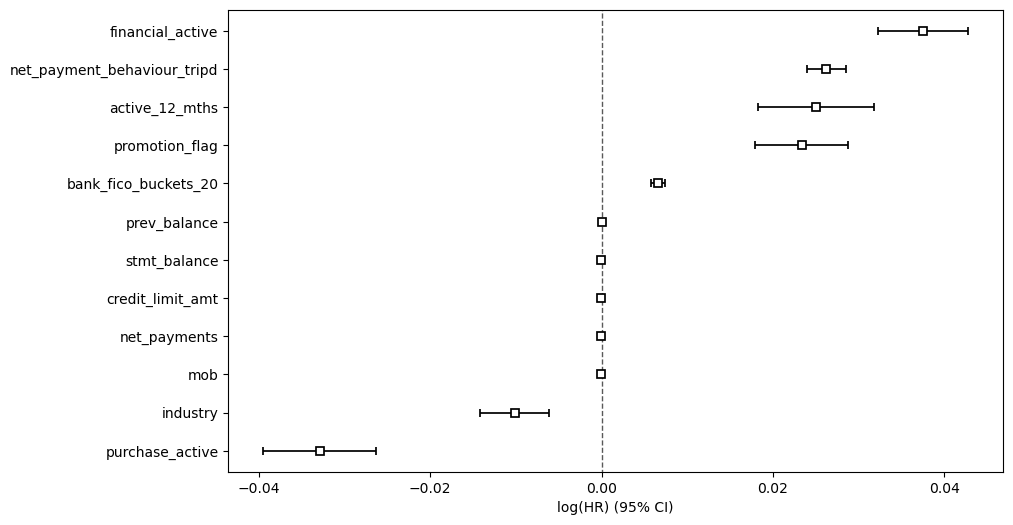

In [447]:
plt.subplots(figsize = (10, 6))
cph2.plot()

In [451]:
cph2.predict_survival_function(forecast.loc[1])

,1
0.0,1.000000
1.0,0.999724
2.0,0.999432
3.0,0.999130
4.0,0.998806
5.0,0.998453
6.0,0.998089
7.0,0.997694
8.0,0.997313
9.0,0.996902


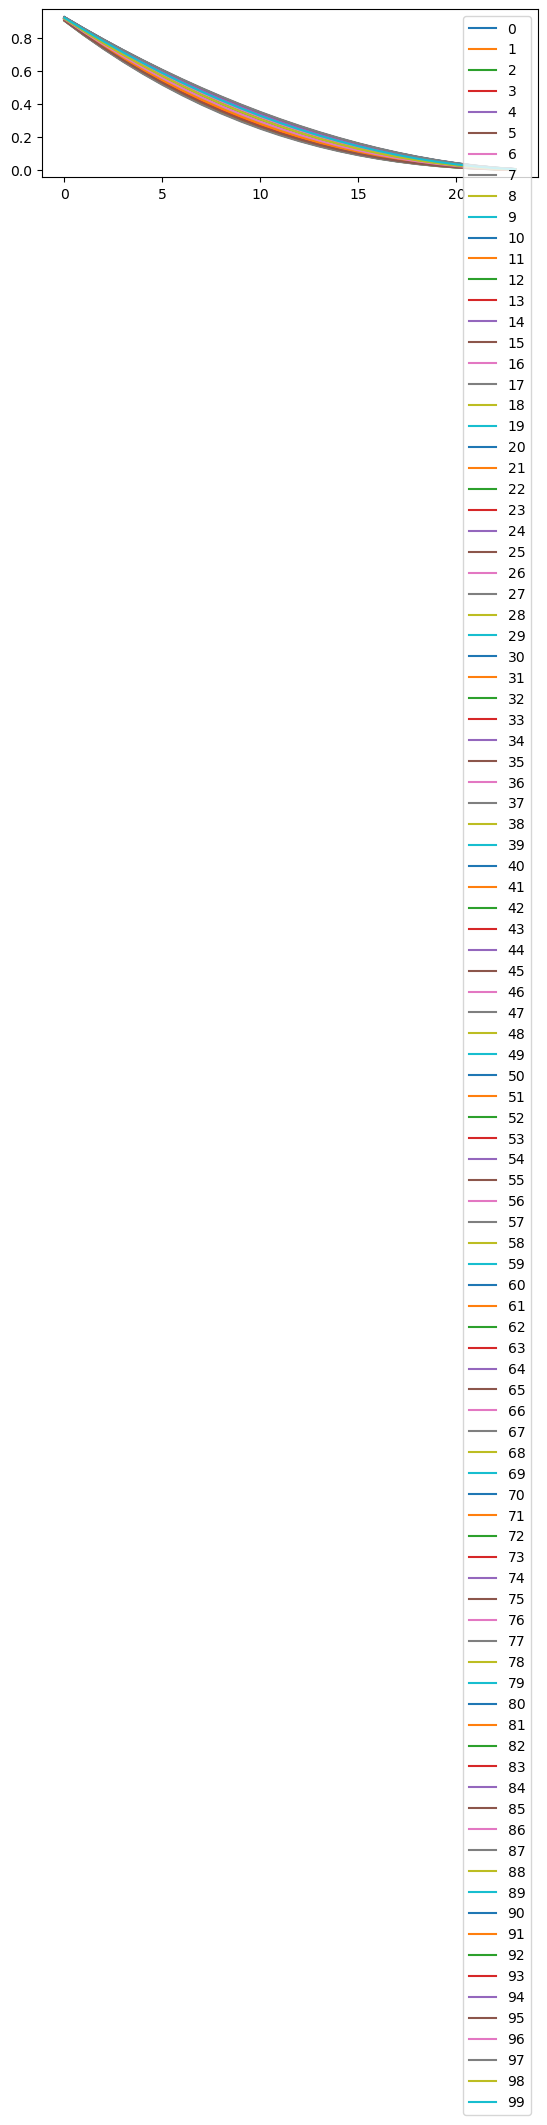

In [454]:
ax = plt.subplot(2,1,2)
for i in range(100):
    cph.predict_survival_function(forecast.loc[i]).plot(ax=ax)


In [435]:
cph.print_summary(style="html")

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <tbody>
    <tr>
      <th>model</th>
      <td>lifelines.CoxPHFitter</td>
    </tr>
    <tr>
      <th>duration col</th>
      <td>'time'</td>
    </tr>
    <tr>
      <th>event col</th>
      <td>'charge_off'</td>
    </tr>
    <tr>
      <th>penalizer</th>
      <td>0.1</td>
    </tr>
    <tr>
      <th>l1 ratio</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>baseline estimation</th>
      <td>breslow</td>
    </tr>
    <tr>
      <th>number of observations</th>
      <td>5.75822e+06</td>
    </tr>
    <tr>
      <th>number of events observed</th>
      <td>5.75822e+06</td>
    </tr>
    <tr>
      <th>partial log-likelihood</th>
      <td>-83861400.62</td>
    </tr>
    <tr>
      <th>time fit was run</th>
 